In [2]:
import camelot
import numpy as np
import pandas as pd

from IPython.display import HTML, display

## working with Camelot

### <font color=green>summary</font>
1. the [documentation](https://camelot-py.readthedocs.io/en/master/user/quickstart.html#read-the-pdf)
2. [Camelot](https://camelot-py.readthedocs.io/en/master/) is written in Python. 
3. It only works with text-based PDFs; if you are working with a document where you can click, drag or select text, you are in business. If document is a scanned image, Camelot is not your tool. 
4. Each table is a Pandas dataframe, easier for ETL workflows
5. Camelot gives 2 options or methods for parsing PDF tables: <font color=orange>Stream</font> & <font color=orange>Lattice</font>
6. Camelot seems to want to deal with documents that have an explicit table structure with intersecting lines not one that has an implied table structure


#### <font color=orange>Stream</font>
* simulates table structure by parsing tables with whitespaces between cells. Search for spaces between text to render a table representation. 
* Guesswork...grouping page words --> rows based on word y coordinates --> no. columns guess based on mode of words in each row
* not ideal for documents with more than 2 tables on a page 2/ different no. of columns. 

#### <font color=orange>Lattice</font>
* Eliminates the guesswork
* Transforms PDF to an image and then uses [OpenCV](https://opencv.org/) to process the image to get horizontal and vertical line segments in the document. 
* The horizontal and vertical segments and their meeting points are used to detect line intersections or cell representations of a table. 
* It also handles tables with demarcating lines between cells &  can parse documents with multiple tables on a page

In [3]:
def processing_approach():
    display(HTML("<table><tr><td><img src='images/camelot-lattice1.png' width='400',hieght='800'></td><td><img src='images/camelot-lattice2.png', width='600',hieght='400'></td></tr></table>"))

In [4]:
processing_approach()

,


In [5]:
file = 'data/pdf_data/Final Exhibit A to Equipment Lease #29.pdf'
searchable_file = 'data/pdf_data/exhibita-10-13-2018.pdf'

In [6]:
# working with an example file
table_list = camelot.read_pdf('data/pdf_data/camelot-example.pdf')
table_list

<TableList n=1>

In [7]:
print(table_list.n)
print('return type is {}'.format(type(table_list)))
table = table_list[0]

1
return type is <class 'camelot.core.TableList'>


The table_list object has two properties: 
1. <font color=red><b>n</b></font>: which is the number of tables found in the pdf document
2. <font color=red><b>export</b></font>: which is a handy method for converting the returned table object to a csv, json or html file 

The tables in the list have useful methods for evaluating the conversion like : <font color=red><b>accuracy, whitespace, page, shape and, parsing_report</b></font>. 

The tables also have very useful methods for transforming the data into useful formats: <font color=red><b>to_excel, to_csv, to_json, and df</b></font>

In [8]:
print(table.shape)
table.parsing_report

(7, 7)


{'accuracy': 99.02, 'whitespace': 12.24, 'order': 1, 'page': 1}

In [9]:
table.df

,0,1,2,3,4,5,6
0,Cycle Name,KI (1/km),Distance (mi),Percent Fuel Savings,,,
1,,,,Improved Speed,Decreased Accel,Eliminate Stops,Decreased Idle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%


### <font color=red>limitations</font>

In [10]:
def license_data():
    display(HTML("<iframe src=https://camelot-py.readthedocs.io/en/master/_static/pdf/column_separators.pdf width=990></iframe>"))

In [11]:
license_data()

In [12]:
# lists don't translate well to dataframe if text is very close together & stream may guess incorrectly
licenses_table_list =  camelot.read_pdf('data/pdf_data/active_licenses.pdf', flavor='stream')
licenses_table_list[0].df

,0,1,2,3,4,5,6,7
0,FEBRUARY 2014 M27 (BUS),,,ALPHABETIC LISTING BY TYPE,,,,ABLPDM27
1,,,,OF ACTIVE LICENSES,,,,3/19/2014
2,,,,OKLAHOMA ABLE COMMISSION,,,,
3,LICENSE,,,PREMISE,,,,
4,NUMBER TYPE DBA NAME,,LICENSEE NAME,ADDRESSCITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,648765 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,,OK,73159,-,2014/12/03
6,,,,7777 EAST APACHE,,,,
7,648766 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,STREET TULSA,OK,74115,-,2014/12/16
8,82030 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,OK,73159,(405) 680-3701,2014/09/14
9,509462 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,OK,74115,(918) 831-6302,2014/08/19


In [13]:
licenses_table_list[0].data

[['FEBRUARY 2014 M27 (BUS)',
  '',
  '',
  'ALPHABETIC LISTING BY TYPE',
  '',
  '',
  '',
  'ABLPDM27'],
 ['', '', '', 'OF ACTIVE LICENSES', '', '', '', '3/19/2014'],
 ['', '', '', 'OKLAHOMA ABLE COMMISSION', '', '', '', ''],
 ['LICENSE', '', '', 'PREMISE', '', '', '', ''],
 ['NUMBER TYPE DBA NAME',
  '',
  'LICENSEE NAME',
  'ADDRESSCITY',
  'ST',
  'ZIP',
  'PHONE NUMBER',
  'EXPIRES'],
 ['648765 AAA',
  '',
  'ALLEGIANT AIR                    ALLEGIANT AIR LLC              7100 TERMINAL DRIVE          OKLAHOMA CITY',
  '',
  'OK',
  '73159',
  '-',
  '2014/12/03'],
 ['', '', '', '7777 EAST APACHE', '', '', '', ''],
 ['648766 AAA',
  '',
  'ALLEGIANT AIR                    ALLEGIANT AIR LLC',
  'STREET                 TULSA',
  'OK',
  '74115',
  '-',
  '2014/12/16'],
 ['82030 AAA',
  '',
  'AMERICAN AIRLINES           AMERICAN AIRLINES INC     7100 TERMINAL DRIVE          OKLAHOMA CITY',
  '',
  'OK',
  '73159',
  '(405) 680-3701',
  '2014/09/14'],
 ['509462 AAA',
  '',
  'AMERICAN

In [14]:
# requires playing around with text plotting to get x coordinates to feed to columns location list as parsing parameter
# however, this functionality does not seem to render with the plot method using jupyter notebooks
better_table_list = camelot.read_pdf('data/pdf_data/active_licenses.pdf', flavor='stream',
                                    columns=['72,95,209,327,442,529,566,606,683'],split_text=True)

In [15]:
better_table_list[0].df

,0,1,2,3,4,5,6,7,8,9
0,FEB,RUAR,Y 2014 M27 (BUS),,ALPHABETIC LISTING BY T,YPE,,,,ABLPDM27
1,,,,,OF ACTIVE LICENSES,,,,,3/19/2014
2,,,,,OKLAHOMA ABLE COMMIS,SION,,,,
3,LICENSE,,,,PREMISE,,,,,
4,NUMBER,TYPE,DBA NAME,LICENSEE NAME,ADDRESS,CITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,648765,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,-,2014/12/03
6,,,,,7777 EAST APACHE,,,,,
7,648766,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,STREET,TULSA,OK,74115,-,2014/12/16
8,82030,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,(405) 680-3701,2014/09/14
9,509462,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7777 EAST APACHE DRIVE,TULSA,OK,74115,(918) 831-6302,2014/08/19


The plot method provides a way to visualize the impact specifying columns has on a table


tight table


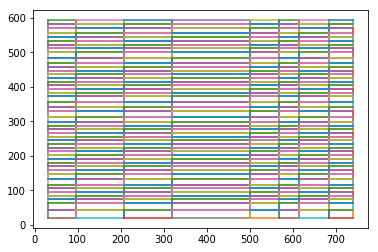

None
specifying column separators


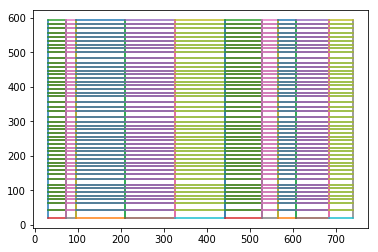

None


In [16]:
for key,table in {'tight table': licenses_table_list[0], 
              'specifying column separators': better_table_list[0]}.items():
    print(key)
    print(table.plot('table'))

In [17]:
# nothing much happening if the document is scanned
camelot.read_pdf(file, pages='1-10')

<TableList n=0>

## <font color=orange>useful components</font>

In [18]:
# using lattice flavor
camelot.read_pdf(searchable_file, pages='1-10', flavor='lattice')

<TableList n=0>

In [19]:
# using stream flavor
no_tables_found = camelot.read_pdf(searchable_file,pages='1-10',flavor='stream')

In [20]:
no_tables_found

<TableList n=10>

1. camelot is a table-hunter.  It pushes parsed objects to a TableList even when it warns you that no table is found. 
2. This aggressive behavior allows us to plot a visual representation of page structure if we want a quick scan OR as part of another process you may have that reads and makes decisions based on page structure


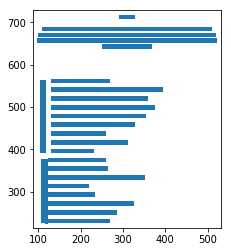

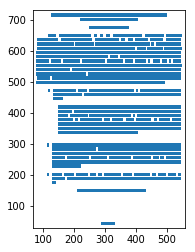

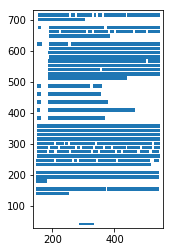

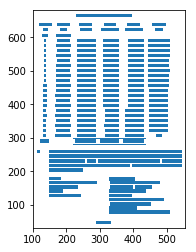

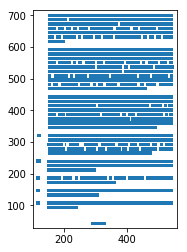

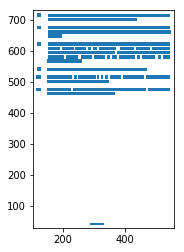

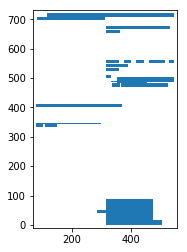

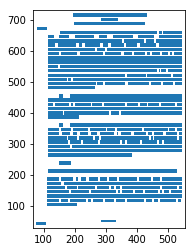

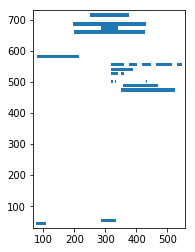

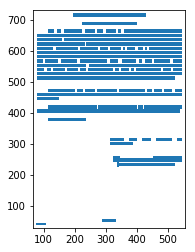

In [21]:
for page in range(no_tables_found.n):
    no_tables_found[page].plot('text')

```camelot.read_pdf('page4-10-14-2018.pdf')``` vs. ```camelot.read_pdf('page4-10-14-2018.pdf', flavor='stream')```

In [22]:
# using the default of the much more rigid lattice object fails to detect anything
camelot.read_pdf('page4-10-14-2018.pdf')

<TableList n=0>

In [23]:
# using stream returns a table list object
page4_table_list = camelot.read_pdf('page4-10-14-2018.pdf',flavor='stream')
page4_table = page4_table_list[0]

In [24]:
page4_table.shape

(40, 6)

In [25]:
page4_table.accuracy

91.85776046733639

In [26]:
page4_table.parsing_report

{'accuracy': 91.86, 'whitespace': 31.25, 'order': 1, 'page': 1}

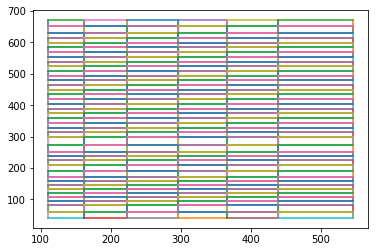

In [27]:
page4_table.plot('table')

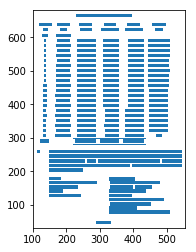

In [28]:
page4_table.plot('text')

1. Camelot's table object has a data property that is clean & useful. 
2. Nested lists & row packing 

In [29]:
display(HTML("<table><tr><td><img src='images/top-row-blankspace.png'></td></tr></table>"))
page4_table.data[0:5]

""


[['', '', '', 'AMORTIZATION SCHEDULE', '', ''],
 ['Payment', 'Payment', 'Payment', 'Interest', 'Principal', 'Purchase'],
 ['No.', 'Date', 'Amount', 'Component', 'Component', 'Price'],
 ['Loan', '11/9/2017', '', '', '', ''],
 ['1',
  '5/1/2018',
  '1,100,264.54',
  '273,262.18',
  '827,002.36',
  '18,606,566.47']]

In [30]:
page4_table.df

,0,1,2,3,4,5
0,,,,AMORTIZATION SCHEDULE,,
1,Payment,Payment,Payment,Interest,Principal,Purchase
2,No.,Date,Amount,Component,Component,Price
3,Loan,11/9/2017,,,,
4,1,5/1/2018,"1,100,264.54","273,262.18","827,002.36","18,606,566.47"
5,2,11/1/2018,"1,100,264.54","271,872.65","828,391.89","17,753,322.82"
6,3,5/1/2019,"1,100,264.54","259,405.35","840,859.19","16,887,237.86"
7,4,11/1/2019,"1,100,264.54","246,750.42","853,514.12","16,008,118.31"
8,5,5/1/2020,"1,100,264.54","233,905.03","866,359.51","15,115,768.02"
9,6,11/1/2020,"1,100,264.54","220,866.32","879,398.22","14,209,987.85"


#### <font color=grey>a useful little gem</font>
* Camelot provides a method for detecting and handling superscript and subscripts in table cells with a parameter flag_size.  ```flag_size=True```

#### <font color=grey>an evem more useful little gem</font>
* automated detection and handling of rotated pages 
    ![](images/smiley-face.png)

In [31]:
def rotation_handling():
    display(HTML("<table><tr><td><img src='images/rotated-table.png' width='300', hieght='300'></td><td><img src='images/twisted-table-plot.png' width='450', hieght='600'></td></tr></table>"))

In [32]:
rotation_handling()

,


In [33]:
twisted_table_list = camelot.read_pdf('data/pdf_data/camelot-twisted.pdf')
twisted_table = twisted_table_list[0]

In [34]:
twisted_table.df

,0,1,2,3,4,5,6,7,8,9
0,State,Nutritional Assessment (No. of individuals),,,,IYCF Practices (No. of mothers: 2011-12),Blood Pressure (No. of adults: 2011-12),,Fasting Blood Sugar (No. of adults:2011-12),
1,,1975-79,1988-90,1996-97,2011-12,,Men,Women,Men,Women
2,Kerala,5738,6633,8864,8297,245,2161,3195,1645,2391
3,Tamil Nadu,7387,10217,5813,7851,413,2134,2858,1119,1739
4,Karnataka,6453,8138,12606,8958,428,2467,2894,1628,2028
5,Andhra Pradesh,5844,9920,9545,8300,557,1899,2493,1111,1529
6,Maharashtra,5161,7796,6883,9525,467,2368,2648,1417,1599
7,Gujarat,4403,5374,4866,9645,477,2687,3021,2122,2503
8,Madhya Pradesh,*,*,*,7942,470,1965,2150,1579,1709
9,Orissa,3756,5540,12024,8473,398,2040,2624,1093,1628


### Camelot provides a method for examining graphical representations of returned tabular data objects with the plot method

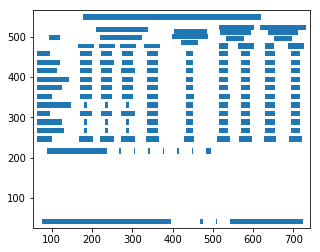

In [35]:
twisted_table.plot(geometry_type='text')

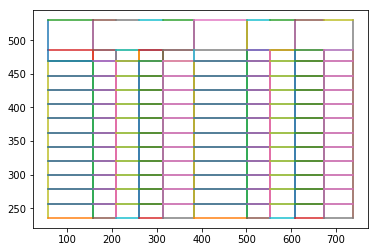

In [36]:
twisted_table.plot(geometry_type='table')